<a href="https://colab.research.google.com/github/sherna90/desafio_suptech/blob/main/embedding2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import sklearn as sklearn

In [ ]:
 !pip install keras

In [2]:
try:
    from google.colab import drive
    %tensorflow_version 2.x
    COLAB = True
    print("Note: using Google CoLab")
except:
    print("Note: not using Google CoLab")
    COLAB = False

Note: not using Google CoLab


In [3]:
import os

if COLAB:
    data_path='/content/drive/MyDrive/Colab Notebooks/data'
else:
    data_path='data'
    
df=pd.read_excel(
     os.path.join(data_path, "reclamos_20201221_con_clas.xlsx"),
     engine='openpyxl',
)

In [4]:
df.columns

Index(['CASO_ID', 'MERCADO_ANALISTA', 'DESCRIPCION_CIUDADANO',
       'PETICION_CIUDADANO'],
      dtype='object')

In [5]:
df['MERCADO_ANALISTA']=df['MERCADO_ANALISTA'].astype('category')

In [6]:
df=df[['MERCADO_ANALISTA','PETICION_CIUDADANO','DESCRIPCION_CIUDADANO']].dropna()

In [7]:
df['data'] = df['DESCRIPCION_CIUDADANO'] + df['PETICION_CIUDADANO']

In [8]:
df_data=df[['MERCADO_ANALISTA', 'data']]

In [9]:
print(df_data.head())

         MERCADO_ANALISTA                                               data
0  APIA -Reclamo Seguros   RECIBI UN CORREO ELECTRONICO DONDE SE ME INDIC...
1  APIA -Reclamo Seguros   Mi nombre es XX y el día 27 de Enero de este a...
2  APIA -Reclamo Seguros   Estimados Señores SVS\n\nCon fecha 13 de Octub...
3  APIA -Reclamo Seguros   En primera instancia solicité renvar mi tarjet...
4         Reclamo Valores  reclamo en contra Scotiabank por cobros de man...


In [10]:
!python -m spacy download es_core_news_sm

/usr/bin/sh: 1: python: not found


In [10]:
import spacy
import es_core_news_sm

nlp = es_core_news_sm.load()

In [11]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/sergio/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [12]:
from nltk.corpus import stopwords

stop_words=stopwords.words('spanish')
def preprocess(text):
  	# Create Doc object
    doc = nlp(text, disable=['ner', 'parser'])
    # Generate lemmas
    lemmas = [token.lemma_ for token in doc]
    # Remove stopwords and non-alphabetic characters
    a_lemmas = [lemma for lemma in lemmas 
            if lemma.isalpha() and lemma not in stop_words]
    
    return ' '.join(a_lemmas)
  
# Apply preprocess to ted['transcript']
df_data['transcript'] = df_data['data'].apply(preprocess)
print(df_data['transcript'])

0      RECIBI UN CORREO ELECTRONICO DONDE SE ME INDIC...
1      Mi nombrar ser XX día Enero año entregar carta...
2      Estimados Señores SVS Con fecho Octubre decir ...
3      En primero instancia solicitar renvar tarjeta ...
4      reclamar Scotiabank cobro mantención producto ...
                             ...                        
994    Estimados favor revisar procesar fusión ITAU C...
995    Con fecho febrero ser protestar cheque rescata...
996    Mal calcular valor póliza ahorrar error tipo c...
997    Estimados SVS Con fecho haber anular orden ven...
998    Tengo traspasar do mil quinientas accionar Com...
Name: transcript, Length: 999, dtype: object


<ipython-input-12-4a226a67a13a>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data['transcript'] = df_data['data'].apply(preprocess)


In [17]:
df_data['transcript']=df_data['transcript'].map(str).str.lower()

<ipython-input-17-35cf3be8836b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data['transcript']=df_data['transcript'].map(str).str.lower()


In [18]:
print(df_data[['transcript', 'data']])

                                            transcript  \
0    recibi un correo electronico donde se me indic...   
1    mi nombrar ser xx día enero año entregar carta...   
2    estimados señores svs con fecho octubre decir ...   
3    en primero instancia solicitar renvar tarjeta ...   
4    reclamar scotiabank cobro mantención producto ...   
..                                                 ...   
994  estimados favor revisar procesar fusión itau c...   
995  con fecho febrero ser protestar cheque rescata...   
996  mal calcular valor póliza ahorrar error tipo c...   
997  estimados svs con fecho haber anular orden ven...   
998  tengo traspasar do mil quinientas accionar com...   

                                                  data  
0    RECIBI UN CORREO ELECTRONICO DONDE SE ME INDIC...  
1    Mi nombre es XX y el día 27 de Enero de este a...  
2    Estimados Señores SVS\n\nCon fecha 13 de Octub...  
3    En primera instancia solicité renvar mi tarjet...  
4    reclamo en co

In [19]:
X = df_data['transcript']
y = (df['MERCADO_ANALISTA']=='Reclamo Valores').astype(int)

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(669,) (330,) (669,) (330,)


GRAFICO PARA VER ACC Y LOSS

In [21]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

In [22]:
import tensorflow.keras as keras

TOKENIZAMOS EL TEXTO

In [23]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

X_trainT = tokenizer.texts_to_sequences(X_train)
X_testT = tokenizer.texts_to_sequences(X_test)

vocab_size = len(tokenizer.word_index) + 1  # Adding 1 because of reserved 0 index



In [24]:
for word in ['el', 'todos', 'seguro']:
...     print('{}: {}'.format(word, tokenizer.word_index[word]))

el: 8
todos: 536
seguro: 2


In [25]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

maxlen = 100

X_train = pad_sequences(X_trainT, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_testT, padding='post', maxlen=maxlen)

print(X_train[0, :])

[ 387  322  214  878 1139 1341   69  748 2208 1137  470  128 1055 1243
    1  136  879  822 1882  645  924    7   45  821   18 3739   95 3740
  302    6 1474  278 2725 2209  487  234  291  826    1 3741   14 1883
   15 1340 1242  198  704  612  613  118  598  303  822 1882  821   18
    4   13  706 1137  470 2210  244   22  191  137    3  925  529   63
   25   16   14 1883   15   94   27 1340 1242  198  704   24  376   13
 3742   19  680 3743 2211  292   34  821   18  161  183  471   15  349
 2728 1342]


In [26]:
y_train

235    0
366    1
512    1
503    1
118    0
      ..
935    1
885    0
686    0
66     0
465    1
Name: MERCADO_ANALISTA, Length: 669, dtype: int64

# MODELAMOS CON EMBEDDING LAYER

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

embedding_dim = 100

model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 100)          714400    
_________________________________________________________________
flatten (Flatten)            (None, 10000)             0         
_________________________________________________________________
dense (Dense)                (None, 10)                100010    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 814,421
Trainable params: 814,421
Non-trainable params: 0
_________________________________________________________________


Training Accuracy: 1.0000
Testing Accuracy:  0.8939


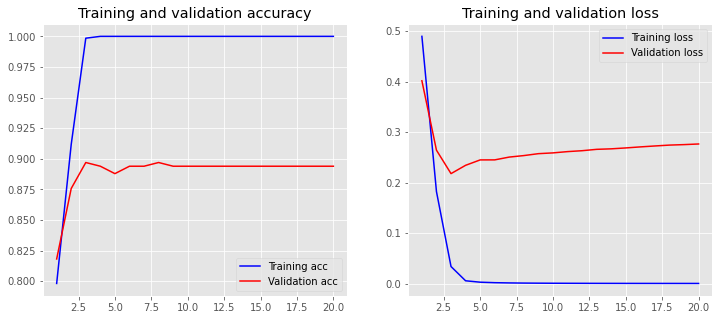

In [28]:
history = model.fit(X_train, y_train,
                    epochs=20,
                    verbose=False,
                    validation_data=(X_test, y_test),
                    batch_size=10)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

In [29]:
import numpy as np
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)

print(classification_report(y_test, np.int32(y_pred>0.5)))

              precision    recall  f1-score   support

           0       0.87      0.99      0.93       226
           1       0.96      0.69      0.80       104

    accuracy                           0.89       330
   macro avg       0.92      0.84      0.87       330
weighted avg       0.90      0.89      0.89       330



# MODELAMOS CON EMBEDDING LAYER CON GLOBALMAXPOOL

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

embedding_dim = 100

model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))
model.add(layers.GlobalMaxPool1D())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 100)          714400    
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 100)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1010      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 11        
Total params: 715,421
Trainable params: 715,421
Non-trainable params: 0
_________________________________________________________________


Training Accuracy: 1.0000
Testing Accuracy:  0.9606


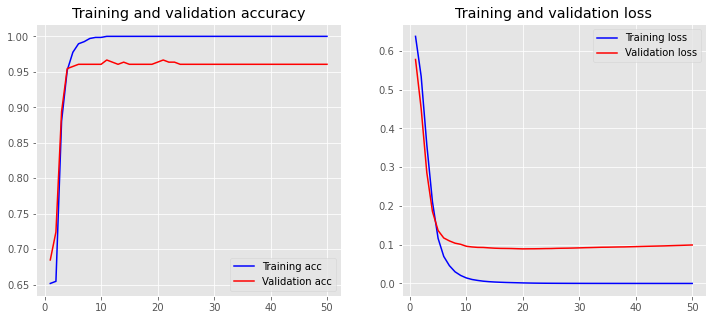

In [32]:
history = model.fit(X_train, y_train,
                    epochs=50,
                    verbose=False,
                    validation_data=(X_test, y_test),
                    batch_size=10)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

In [33]:
y_pred = model.predict(X_test)

print(classification_report(y_test, np.int32(y_pred>0.5)))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       226
           1       0.94      0.93      0.94       104

    accuracy                           0.96       330
   macro avg       0.96      0.95      0.95       330
weighted avg       0.96      0.96      0.96       330



# Convolutional Neural Networks (CNN)

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

embedding_dim = 100

model = Sequential()
model.add(layers.Embedding(vocab_size, embedding_dim, input_length=maxlen))
model.add(layers.Conv1D(128, 5, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 100)          742300    
_________________________________________________________________
conv1d (Conv1D)              (None, 96, 128)           64128     
_________________________________________________________________
global_max_pooling1d (Global (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                1290      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 807,729
Trainable params: 807,729
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train, y_train,
                    epochs=10,
                    verbose=False,
                    validation_data=(X_test, y_test),
                    batch_size=10)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

# EMBEDDING de palabras pre-entrenadas

In [35]:
!pip3 install --user gensim

     |████████████████████████████████| 24.2 MB 501 kB/s  eta 0:00:01
     |████████████████████████████████| 111 kB 13.6 MB/s eta 0:00:01


In [36]:
from gensim.models.keyedvectors import KeyedVectors
wordvectors_file_vec = 'data/glove-sbwc.i25.vec'
cantidad = 100000
wordvectors = KeyedVectors.load_word2vec_format(wordvectors_file_vec, limit=cantidad)

In [37]:
wordvectors.most_similar_cosmul(positive=['rey','mujer'],negative=['hombre'])

[('reina', 0.9141066670417786),
 ('isabel', 0.8743277192115784),
 ('princesa', 0.843113124370575),
 ('infanta', 0.8425983190536499),
 ('monarca', 0.8357319831848145),
 ('hija', 0.8211697936058044),
 ('consorte', 0.8179485201835632),
 ('iv', 0.813984215259552),
 ('esposa', 0.8115167617797852),
 ('ii', 0.8099035024642944)]

In [38]:
import numpy as np

def create_embedding_matrix(filepath, word_index, embedding_dim):
    vocab_size = len(word_index) + 1  # Adding again 1 because of reserved 0 index
    embedding_matrix = np.zeros((vocab_size, embedding_dim))

    with open(filepath) as f:
        for line in f:
            word, *vector = line.split()
            if word in word_index:
                idx = word_index[word] 
                embedding_matrix[idx] = np.array(
                    vector, dtype=np.float32)[:embedding_dim]

    return embedding_matrix

In [40]:
embedding_dim = 100
embedding_matrix = create_embedding_matrix(
        data_path+'/glove-sbwc.i25.vec',
        tokenizer.word_index, embedding_dim)

In [41]:
nonzero_elements = np.count_nonzero(np.count_nonzero(embedding_matrix, axis=1))
nonzero_elements / vocab_size

0.9032754759238522

In [45]:
model = Sequential()
model.add(layers.Embedding(vocab_size, embedding_dim, 
                           weights=[embedding_matrix], 
                           input_length=maxlen, 
                           trainable=False))
model.add(layers.GlobalMaxPool1D())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 100, 100)          714400    
_________________________________________________________________
global_max_pooling1d_3 (Glob (None, 100)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 32)                3232      
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 33        
Total params: 717,665
Trainable params: 3,265
Non-trainable params: 714,400
_________________________________________________________________


Training Accuracy: 0.8729
Testing Accuracy:  0.8636


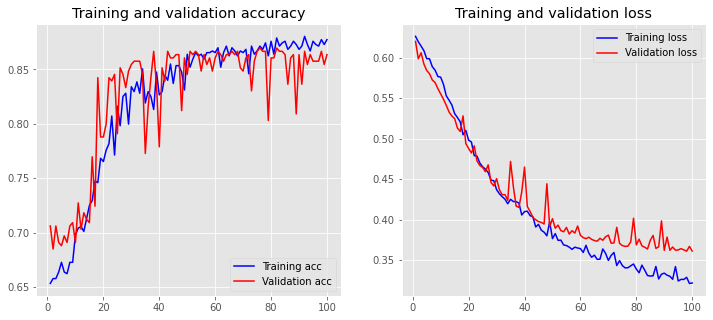

In [46]:
history = model.fit(X_train, y_train,
                    epochs=100,
                    verbose=False,
                    validation_data=(X_test, y_test),
                    batch_size=32)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

In [48]:
y_pred = model.predict(X_test)

print(classification_report(y_test, np.int32(y_pred>0.5)))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91       226
           1       0.87      0.66      0.75       104

    accuracy                           0.86       330
   macro avg       0.87      0.81      0.83       330
weighted avg       0.86      0.86      0.86       330



In [49]:
model = Sequential()
model.add(layers.Embedding(vocab_size, embedding_dim, 
                           weights=[embedding_matrix], 
                           input_length=maxlen, 
                           trainable=True))
model.add(layers.GlobalMaxPool1D())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 100, 100)          714400    
_________________________________________________________________
global_max_pooling1d_4 (Glob (None, 100)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 32)                3232      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 33        
Total params: 717,665
Trainable params: 717,665
Non-trainable params: 0
_________________________________________________________________


Training Accuracy: 1.0000
Testing Accuracy:  0.9364


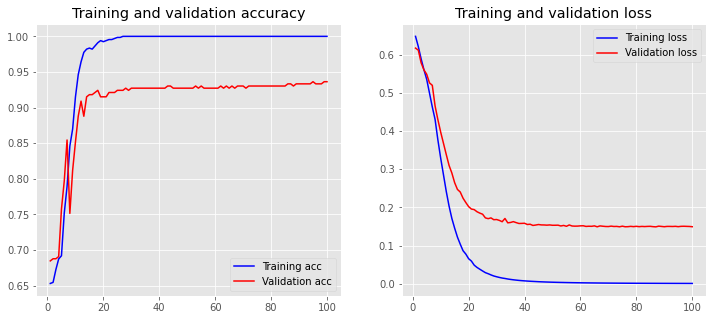

In [50]:
history = model.fit(X_train, y_train,
                    epochs=100,
                    verbose=False,
                    validation_data=(X_test, y_test),
                    batch_size=32)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

In [52]:
y_pred = model.predict(X_test)

print(classification_report(y_test, np.int32(y_pred>0.5)))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95       226
           1       0.95      0.85      0.89       104

    accuracy                           0.94       330
   macro avg       0.94      0.91      0.92       330
weighted avg       0.94      0.94      0.94       330



In [ ]:
def create_model1(num_filters, kernel_size, vocab_size, embedding_dim, maxlen):
    model = Sequential()
    model.add(layers.Embedding(vocab_size, embedding_dim, input_length=maxlen))
    model.add(layers.Conv1D(num_filters, kernel_size, activation='relu'))
    model.add(layers.GlobalMaxPooling1D())
    model.add(layers.Dense(10, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

In [ ]:
def create_model2(num_filters, kernel_size, vocab_size, embedding_dim, maxlen):
    model = Sequential()


    model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))
    model.add(layers.GlobalMaxPool1D())
    model.add(layers.Dense(10, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))



    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV

# Main settings
epochs = 20
embedding_dim = 50
maxlen = 100
output_file = 'data/output.txt'

X = df_data['transcript']
y = (df['MERCADO_ANALISTA']=='Reclamo Valores').astype(int)

# Train-test split
sentences_train, sentences_test, y_train, y_test = train_test_split(
        X, y, test_size=0.25, random_state=1000)

# Tokenize words
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(sentences_train)
X_train = tokenizer.texts_to_sequences(sentences_train)
X_test = tokenizer.texts_to_sequences(sentences_test)

# Adding 1 because of reserved 0 index
vocab_size = len(tokenizer.word_index) + 1

# Pad sequences with zeros
X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

# Parameter grid for grid search
param_grid = dict(num_filters=[32, 64, 128],
                  kernel_size=[3, 5, 7],
                  vocab_size=[vocab_size],
                  embedding_dim=[embedding_dim],
                  maxlen=[maxlen])
model = KerasClassifier(build_fn=create_model2,
                        epochs=epochs, batch_size=10,
                        verbose=False)
grid = RandomizedSearchCV(estimator=model, param_distributions=param_grid,
                              cv=4, verbose=1, n_iter=5)
grid_result = grid.fit(X_train, y_train)

# Evaluate testing set
test_accuracy = grid.score(X_test, y_test)



Fitting 4 folds for each of 5 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  2.6min finished


In [ ]:
print('MODEL SIN CONV1D')
print("Training Accuracy: {:.4f}".format(grid_result.best_score_))
print(grid_result.best_params_)
print("Test Accuracy: {:.4f}".format(test_accuracy))

Training Accuracy: 0.9533
{'vocab_size': 7735, 'num_filters': 32, 'maxlen': 100, 'kernel_size': 3, 'embedding_dim': 50}
Test Accuracy: 0.8760


In [ ]:
print('MODEL CON CONV1D')
print("Training Accuracy: {:.4f}".format(grid_result.best_score_))
print(grid_result.best_params_)
print("Test Accuracy: {:.4f}".format(test_accuracy))

MODEL CON CONV1D
Training Accuracy: 0.9506
{'vocab_size': 7735, 'num_filters': 128, 'maxlen': 100, 'kernel_size': 5, 'embedding_dim': 50}
Test Accuracy: 0.9640
